In [1]:
import pandas
from matplotlib import pyplot as plt

In [61]:
df = pandas.read_csv('girg.csv', sep=',')
df.describe()


,n,deg,ple,T,d,s1,s2,s3,rep,time,branches,root_size,root_gap,root_time,lower,upper,solved,opt,adds,dels
count,169.000000,169.000000,1.690000e+02,169.000000,169.0,1.690000e+02,169.000000,1.690000e+02,169.000000,1.690000e+02,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02,169.000000,169.000000
mean,220.710059,14.378698,2.900000e+00,0.113609,2.0,1.297016e+07,632154.076923,9.021138e+07,4.473373,1.965942e+06,269.840237,167.952663,27.905325,64192.402367,991.621302,1021.384615,0.526627,4.733731e+08,14108.810651,272.491124
std,69.114932,13.697359,8.908179e-16,0.233742,0.0,1.149730e+04,11497.296221,1.149730e+04,2.868269,1.663075e+06,358.434598,92.196724,49.780021,98344.288633,918.917511,967.700840,0.500774,5.007740e+08,20802.983763,302.210017
min,100.000000,4.000000,2.900000e+00,0.000000,2.0,1.295135e+07,613351.000000,9.019258e+07,0.000000,7.120000e+02,0.000000,1.000000,0.000000,712.000000,161.000000,165.000000,0.000000,1.650000e+02,12.000000,0.000000
25%,200.000000,10.000000,2.900000e+00,0.000000,2.0,1.295914e+07,621142.000000,9.020037e+07,2.000000,7.220400e+04,13.000000,135.000000,8.000000,12375.000000,586.000000,590.000000,0.000000,5.900000e+02,49.000000,0.000000
50%,200.000000,10.000000,2.900000e+00,0.000000,2.0,1.297170e+07,633699.000000,9.021293e+07,4.000000,2.478750e+06,86.000000,187.000000,14.000000,29604.000000,685.000000,706.000000,1.000000,1.025000e+03,88.000000,192.000000
75%,200.000000,10.000000,2.900000e+00,0.000000,2.0,1.297994e+07,641940.000000,9.022117e+07,7.000000,3.600747e+06,396.000000,200.000000,22.000000,74600.000000,1037.000000,1062.000000,1.000000,1.000000e+09,18869.000000,553.000000
max,400.000000,64.000000,2.900000e+00,0.800000,2.0,1.298822e+07,650215.000000,9.022944e+07,9.000000,3.626469e+06,1788.000000,359.000000,275.000000,636882.000000,4256.000000,4531.000000,1.000000,1.000000e+09,77853.000000,1074.000000


plots by n


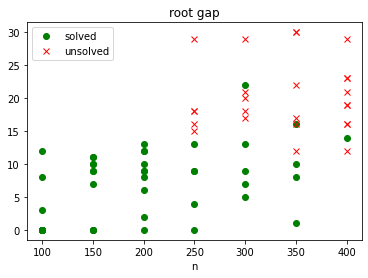

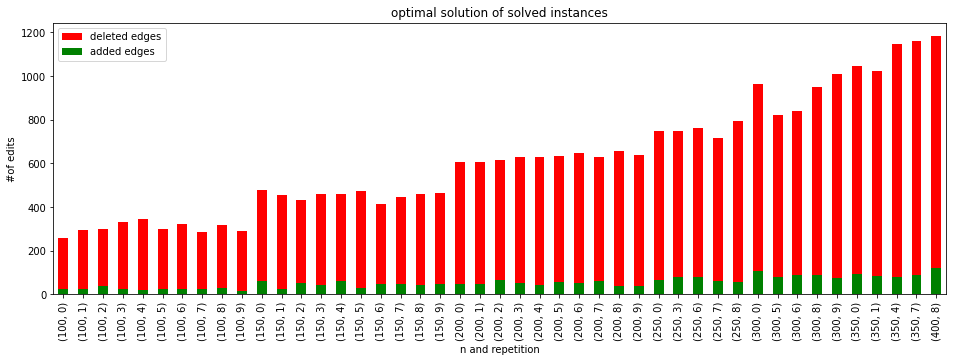

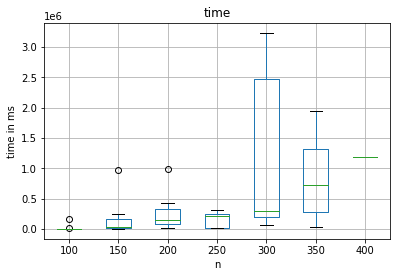

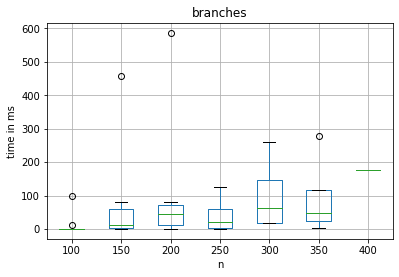

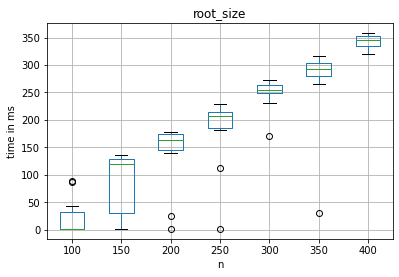

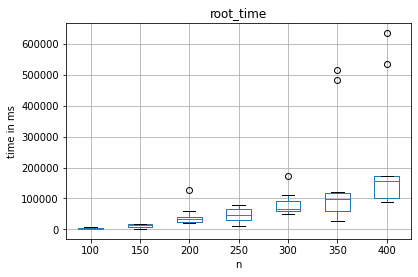

plots by deg


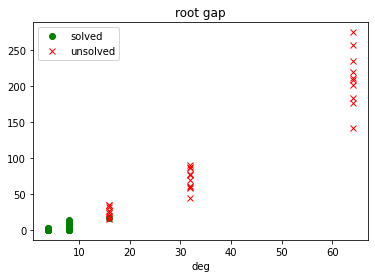

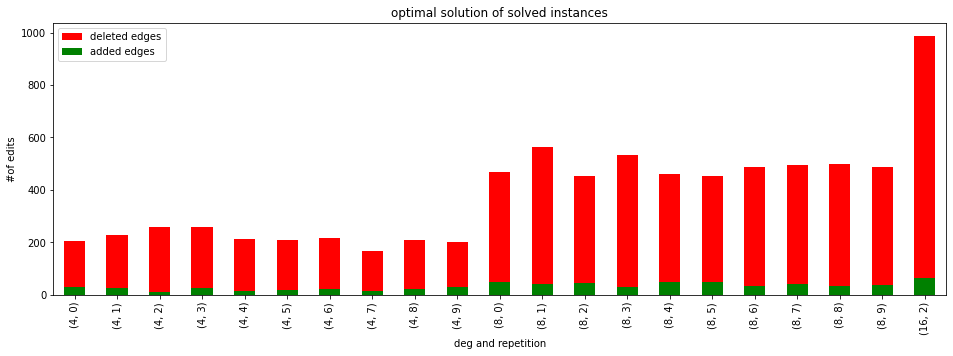

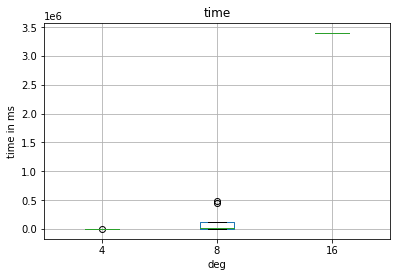

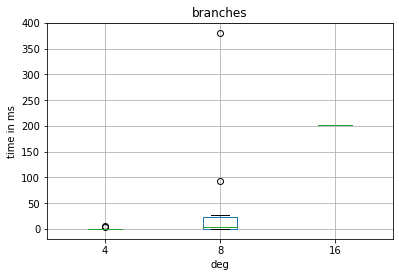

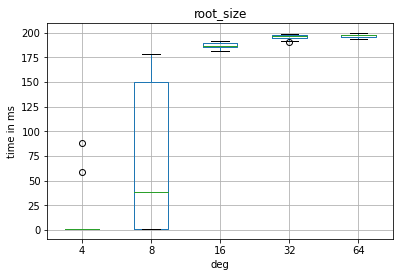

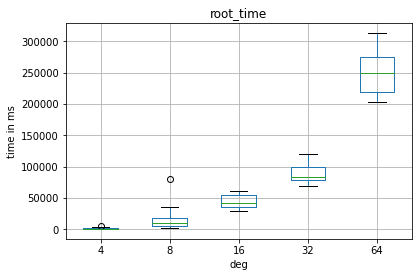

plots by T


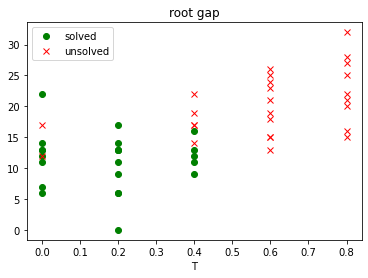

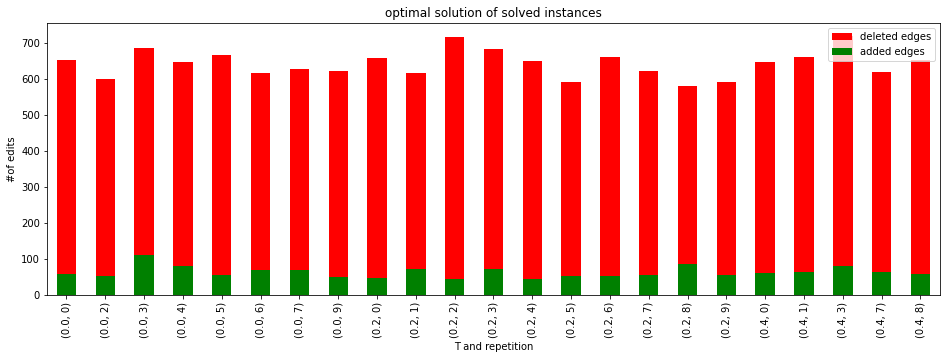

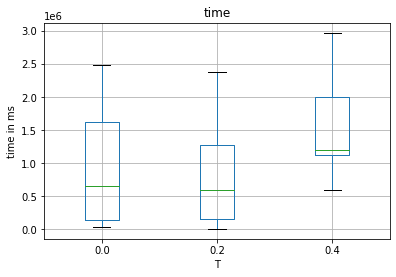

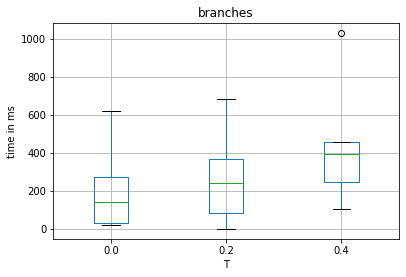

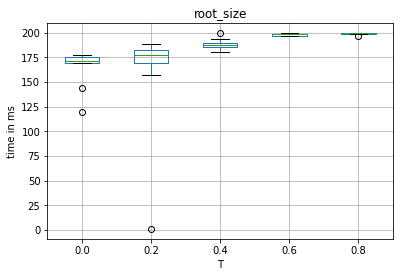

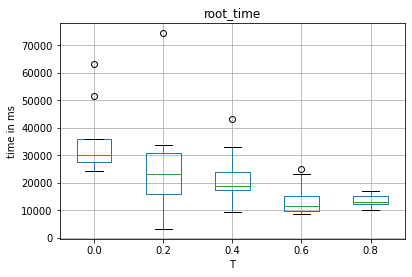

In [96]:
for x in ['n', 'deg', 'T']:
    du = df[df.type==x]
    ds = du[du.solved==1]
    
    print(f'plots by {x}')
    
    du[du.solved==1].plot(x=x, y='root_gap', style='go', ax=plt.gca(), label='solved')
    du[du.solved==0].plot(x=x, y='root_gap', style='rx', ax=plt.gca(), label='unsolved')
    plt.title('root gap')
    plt.show()
    
    dg = ds.groupby([x,'rep']).max()
    (dg.dels+dg.adds).plot.bar(color='r', label='deleted edges')
    dg.adds.plot.bar(color='g', label='added edges')
    plt.gcf().set_size_inches(16,5)
    plt.xlabel(f'{x} and repetition')
    plt.ylabel('#of edits')
    plt.legend()
    plt.title('optimal solution of solved instances')
    plt.show()
    
    for y in ['time', 'branches', 'root_size', 'root_time']:
        (du if 'root' in y else ds).boxplot(by=x, column=y)
        plt.ylabel('time in ms')
        plt.suptitle('')
        plt.show()

